# Linear Regression using Python Scikit Learn

 In this section we will see how to implement linear regression using python scikit learn to predict the percentage of
marks that a student is expected to score based upon the number of hours they studied. This is a simple linear
regression task as it involves just two variables.

In [1]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data from CSV file

In [2]:
# Reading the data from remote line
url = "http://bit.ly/w-data"
study_data = pd.read_csv(url)

In [3]:
# Displaying the first 10 data
study_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Shape of the dataset
study_data.shape

(25, 2)

In [5]:
# Datatypes of each attribute
study_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
# Check for null values
study_data.isnull().any()

Hours     False
Scores    False
dtype: bool

In [7]:
# Summary Statistics of the data
study_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

Plotting a 2D graph on the data points from our dataset using scatter plot to see the distribution of scores and look for any relationship between the data.

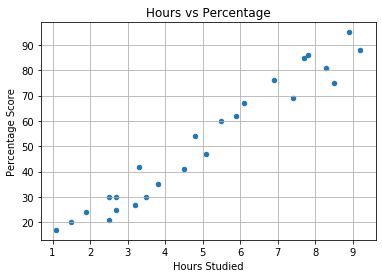

In [8]:
# Plots the distribution of scores
study_data.plot(x='Hours', y='Scores', kind='scatter', grid=True)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data

Dividing the data into inputs (all the attributes except the attribute which needs to be predicted) and output (the attribute which needs to be predicted).

In [9]:
# Inputs
X = study_data.iloc[:,:-1].values
# Output
Y = study_data.iloc[:,-1].values

### Splitting the data

Data is split using train test split from Scikit Learn model_selection module.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Splits data by 80-20 i.e, 80 % of data for training and 20 % of data for testing 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0) 

### Training the Algorithm

We are using Linear Regression model algorithm for our problem from Scikit Learn's linear_model module library.

In [12]:
from sklearn.linear_model import LinearRegression  

In [13]:
# Instantiating the model
regressor = LinearRegression()  
# Fitting the data for training
regressor.fit(X_train, Y_train) 

print('Training done.')

Training done.


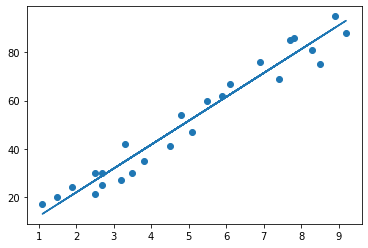

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Making Predictions

After training the model, its time to predict the output values using the input test data.

In [15]:
# Predicting the scores
Y_pred = regressor.predict(X_test) 

In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the model

The last step is to evaluate the performance and efficiency of the algorithm. This step becomes useful to compare it with different algorithms working on the same dataset to see which algorithm performs the best. Here, we have chosen the mean squared error. And there are many such metrics.

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
print('Mean Absolute Error: ',mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error:  4.183859899002975
